# Applying ML Regression Algorithm: Prices

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')

## Loading data

In [2]:
root = '../data/cars_reg.csv'

df = pd.read_csv(root)
df.head()

,doors,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,price,...,Offroad,Pickup,Roadster,Sedan,Stationwagon,Targa,Van,brand_encoded,model_encoded,city_encoded
0,2,99,157,270,145,4.3,780,33,13.7,5500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11039.980916,10171.125628,15841.032810
1,3,179,140,426,235,7.6,1373,55,7.2,10900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17051.258362,13160.993789,18049.881613
2,4,109,142,453,222,4.2,1545,42,8.5,36100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23572.093803,23508.383973,18554.493671
3,5,142,162,467,212,5.4,1740,67,8.0,28000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23572.093803,36412.589552,16569.441935
4,2,488,123,446,189,21.0,1546,70,3.9,27990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12506.369048,17773.464491,17306.168324


## Separating the data into features (X) and target (y) variables

In [3]:
# Train-Test Split
from sklearn.model_selection import train_test_split

In [4]:
# Removing some outliers
features = df.drop('price', axis=1)
target = df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Applying Regression Models
The objective is to obtain the best posible model by evaluating the performance of 7 models

In [6]:
# Regression linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Tree model
from sklearn.ensemble import RandomForestRegressor

# Support Vector Machine model
from sklearn.svm import SVR

# Gradient Boosting models
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Model Evaluators
from sklearn import model_selection
from modules.model_evaluator import eval_reg
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, explained_variance_score as evs

Importing `scikit-learn` main functions for training the model.

Gradient Boost Algorithms were explored and understood following [this Medium Article](https://towardsdatascience.com/lightgbm-vs-xgboost-which-algorithm-win-the-race-1ff7dd4917d)

### Linear Regression

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.6804

RMSE = 7347.8798

MSE = 53991337.9755

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 4915.9177

EVS = 68.0534%



### Ridge Regression

In [8]:
rd = Ridge()
rd.fit(X_train, y_train)

predictions = rd.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.6805

RMSE = 7347.3791

MSE = 53983979.4535

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 4915.7982

EVS = 68.0576%



### Random Forest Regressor

In [9]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.8851

RMSE = 4405.7126

MSE = 19410303.4350

MSLE = 0.0723

MAE = 2599.1442

EVS = 88.5132%



### Support Vector Regression

In [10]:
svr = SVR()
svr.fit(X_train, y_train)

predictions = svr.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.1427

RMSE = 12035.1997

MSE = 144846030.8822

MSLE = 0.4510

MAE = 7743.9395

EVS = 18.2469%



### XGBoost Regressor

In [11]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.8736

RMSE = 4621.8174

MSE = 21361196.4862

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 2957.5602

EVS = 87.3577%



### Light Gradient Boosting Machine (LGBM) Regressor

In [12]:
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)

predictions = lgb_model.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.8524

RMSE = 4994.6053

MSE = 24946082.0588

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 3303.4865

EVS = 85.2395%



### CatBoost Regressor

In [13]:
cb_model = CatBoostRegressor(verbose=False)
cb_model.fit(X_train, y_train)

predictions = cb_model.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.8729

RMSE = 4634.0105

MSE = 21474053.5612

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 3006.4572

EVS = 87.2917%



---

## Visualizing predictions from model

In [14]:
import matplotlib.pyplot as plt

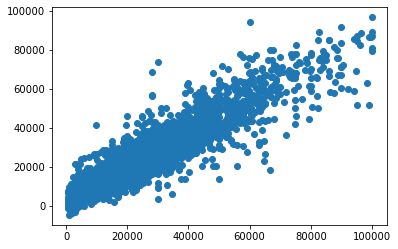

In [15]:
plt.scatter(y_test, predictions);

## Comparing ML Regression Algorithms 

Based on [Jason Brownlee's article](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/).

Since the performance of the `SVR` ($R^2 = 0.1427$) was really poor, it will be excluded from the next model analysis.

`k-fold` is a popular cross-validation technique. It provides visibility about the generalization ability of the model by iterating through different sets.
i.e. say k=10 for example, 9 folds for training and 1 fold for testing purpose and this repeats unless all folds get a chance to be the test set one by one.

In [16]:
from time import time

# example
start_time = time()
exec_time = time() - start_time

print(exec_time)

3.981590270996094e-05


In [17]:
# Set seed to obtain the same random numbers
seed = 42

# Listing models
models = []
models.append(('LR', LinearRegression()))
models.append(('RD', Ridge()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', xgb.XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CB', CatBoostRegressor(verbose=False)))

# Evaluate each model
names = []
results = []
means = []
stds = []
times = []
scoring = 'r2'

# Defining the algorithm function
def run_cv_algorithm(name, model):
    '''
    Function that runs the cross-validation (CV) for the named algorithm
    - name: Designation of the algorithm. 
    - model: Algorithm to be applied.
    '''
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(estimator=model,
                                                 X=features,
                                                 y=target,
                                                 cv=kfold,
                                                 scoring=scoring)
    # appending values to lists
    names.append(name)
    results.append(cv_results)
    means.append(cv_results.mean())
    stds.append(cv_results.std())
    
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

# Executing the function for every model in the list: models
for name, model in models:
    # set start time
    start_time = time()
    
    # running algorithm
    run_cv_algorithm(name, model)
    
    # set end time: execution time
    exec_time = time() - start_time
    
    # Appending to the main list
    times.append(exec_time)
    
    print("{} execution time (sec): {}".format(name, exec_time))

LR: 0.6697198132594168 (0.007359743729852505)
LR execution time (sec): 0.8424632549285889
RD: 0.6697518087168138 (0.007385523997607979)
RD execution time (sec): 0.4552745819091797
RF: 0.884726441128549 (0.005585446785930805)
RF execution time (sec): 430.31739234924316
XGB: 0.8716730928540853 (0.005527604961297416)
XGB execution time (sec): 30.697874069213867
LGBM: 0.849747949832827 (0.004445534828616155)
LGBM execution time (sec): 3.930985689163208
CB: 0.8699328665193274 (0.0052279062268272185)
CB execution time (sec): 97.90422058105469


In [22]:
# Creating a DataFrame to see the performance of each model:
df_models = pd.DataFrame({'model': names,
                          'mean_r2_score': means,
                          'std_r2_score': stds,
                          'exec_time_sec': times})

# Rounding decimals
df_models = df_models.round({'mean_r2_score': 4,
                             'std_r2_score': 4,
                             'exec_time_sec': 4})

# Creating a time_score_ratio
df_models['time_score_ratio'] = df_models['mean_r2_score'] / df_models['exec_time_sec']

df_models

,model,mean_r2_score,std_r2_score,exec_time_sec,time_score_ratio
0,LR,0.6697,0.0074,0.8425,0.794896
1,RD,0.6698,0.0074,0.4553,1.471118
2,RF,0.8847,0.0056,430.3174,0.002056
3,XGB,0.8717,0.0055,30.6979,0.028396
4,LGBM,0.8497,0.0044,3.9310,0.216154
5,CB,0.8699,0.0052,97.9042,0.008885


In [33]:
import seaborn as sns

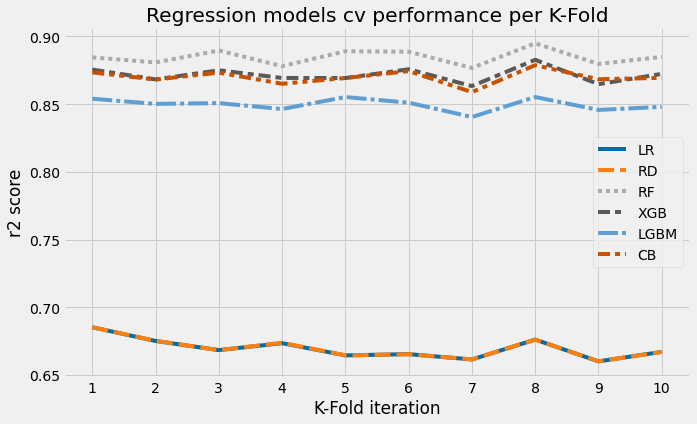

In [97]:
plt.style.use('tableau-colorblind10')

plt.figure(figsize=(10, 6))

sns.lineplot(data=results, dashes=True)

plt.title('Regression models cv performance per K-Fold')
plt.xticks(list(range(0, 10)), list(range(1, 11)))
plt.xlabel('K-Fold iteration')
plt.ylabel('r2 score')

plt.legend(df_models.model.to_list())

plt.show()

In [125]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha="center",
                    va="bottom")

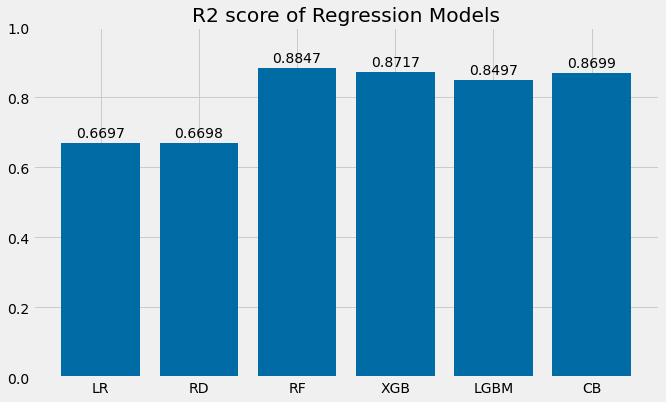

In [128]:
fig, ax = plt.subplots(figsize=(10,6))

rect1 = ax.bar(df_models['model'], df_models['mean_r2_score'])

plt.title('R2 score of Regression Models')
plt.gca().set_ylim([0, 1])

autolabel(rect1)

plt.show()

`RF` was the model with the best performance after applying a cross-validation process. However, it is also by far the most time consuming.

Having a look at the `time_score_ratio` parameter, it is possible to find the most efficient model in terms of `r2_score` and `exec_time`. In this way, the best model can be found when there is a concern about time due to the high amount of data that will feed the model. Linear models are the ones with the highest ratio, nevertheless the $r2\_score$ is not enough to be considered as potential models.

To conclude, `RandomForest` it is the best model when time is not a concern. In case that delays in execution could be a problem, `Boosting`algorithms could be the most suitable option. This is why they will be also considered as potential candidates.

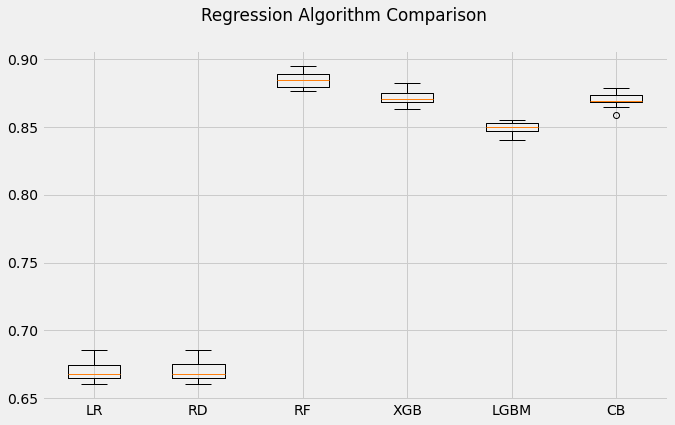

In [133]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression Algorithm Comparison')

ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In the boxplot above, it is possible to see the great difference in performance of the `Boosting & RandomForest` compared to the `LinearRegression & Ridge` algorithms.

Therefore, further investigations about how to improve the performance of the final prediction will be focused on the 4 models below: `RF, XGB, LGBM, CB`

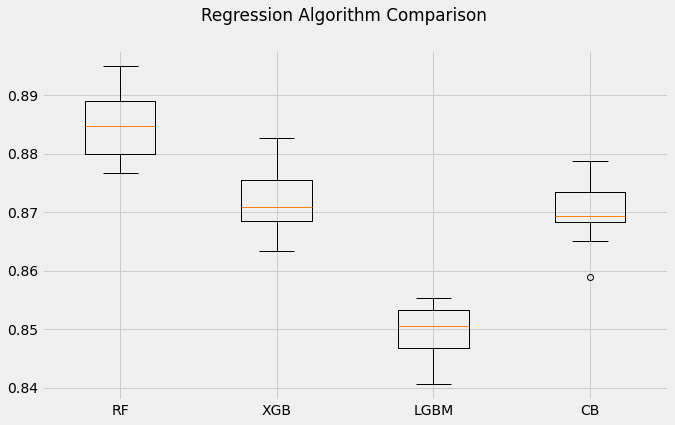

In [134]:
# boxplot best algorithms comparison
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression Algorithm Comparison')

ax = fig.add_subplot(111)
plt.boxplot(results[2:])
ax.set_xticklabels(names[2:])

plt.show()

---

## Deep Learning. Trying a Neural Network model: Multi-Layer Perceptron (MLP)

---

## Applying a MinMaxScaler to standardize the dataset

Let's see if data standardization improves the performance of the selected model. 